In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
import kontrol


h_sc_mean = kontrol.load_transfer_function("sensor_correction_filters/ham4/h_sc_mean.pkl")
h_sc_sigma1 = kontrol.load_transfer_function("sensor_correction_filters/ham4/h_sc_sigma1.pkl")
h_sc_sigma2 = kontrol.load_transfer_function("sensor_correction_filters/ham4/h_sc_sigma2.pkl")

h_sc_prefilt = kontrol.load_transfer_function("sensor_correction_filters/ham4/prefilt.pkl")

h_sc_mean_p = h_sc_mean * h_sc_prefilt
h_sc_sigma1_p = h_sc_sigma1 * h_sc_prefilt
h_sc_sigma2_p = h_sc_sigma2 * h_sc_prefilt

h1_mean = kontrol.load_transfer_function("complementary_filters/ham4/h1_mean.pkl")
h2_mean = kontrol.load_transfer_function("complementary_filters/ham4/h2_mean.pkl")

h1_sigma1 = kontrol.load_transfer_function("complementary_filters/ham4/h1_sigma1.pkl")
h2_sigma1 = kontrol.load_transfer_function("complementary_filters/ham4/h2_sigma1.pkl")

h1_sigma2 = kontrol.load_transfer_function("complementary_filters/ham4/h1_sigma2.pkl")
h2_sigma2 = kontrol.load_transfer_function("complementary_filters/ham4/h2_sigma2.pkl")

h2_prefilt = kontrol.load_transfer_function("complementary_filters/ham4/h2_prefilt.pkl")

s = control.tf("s")
ligo_hsc = kontrol.load_transfer_function("sensor_correction_filters/CML_BB_SC.pkl")
ligo_hsc *= s

wn = 1*2*np.pi
q = 1/np.sqrt(2)
ligo_h1 = kontrol.load_transfer_function("complementary_filters/102mHzv2_disp.pkl")
ligo_h2 = kontrol.load_transfer_function("complementary_filters/102mHzv2_inert.pkl")

ligo_h2 /= (s**2 + wn/q*s + wn**2) / s**3

h2p_mean = h2_mean * h2_prefilt
h2p_sigma1 = h2_sigma1 * h2_prefilt
h2p_sigma2 = h2_sigma2 * h2_prefilt

In [2]:
seis_data = np.load("noise_spectrums/ham4/seismic_mean.npz")
sts_data = np.load("noise_spectrums/ham4/seismometer_mean.npz")
cps_data = np.load("noise_spectrums/ham4/cps.npz")
inert_data = np.load("noise_spectrums/ham4/inert_mean.npz")

f = seis_data["f"]
seis = seis_data["data"]
sts = sts_data["data"]
cps = cps_data["data"]
inert = inert_data["data"]

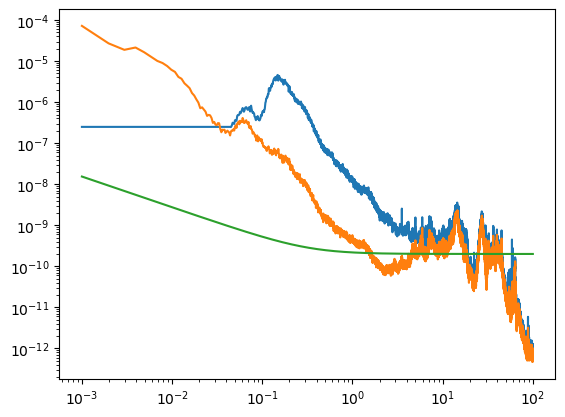

In [3]:
plt.loglog(f, seis, label="Seismic noise")
plt.loglog(f, sts)
plt.loglog(f, cps)

In [30]:
sc_list = [ligo_hsc, h_sc_mean_p, h_sc_sigma1_p, h_sc_sigma2_p]
lp_list = [ligo_h1, h1_mean, h1_sigma1, h1_sigma2]
hp_list = [ligo_h2, h2p_mean, h2p_sigma1, h2p_sigma2]
n_super_list = []

for sc in sc_list:
    seis_filt = abs((1-sc)(1j*2*np.pi*f)) * seis
    sts_filt = abs(sc(1j*2*np.pi*f)) * sts
    n_sc = (seis_filt**2 + sts_filt**2)**.5
    n_cps = (cps**2 + n_sc**2)**.5
    for lp, hp in zip(lp_list, hp_list):
        cps_filt = abs(lp(1j*2*np.pi*f)) * n_cps
        inert_filt = abs(hp(1j*2*np.pi*f)) * inert
        n_super = (cps_filt**2 + inert_filt**2)**.5
        n_super_list.append(n_super)

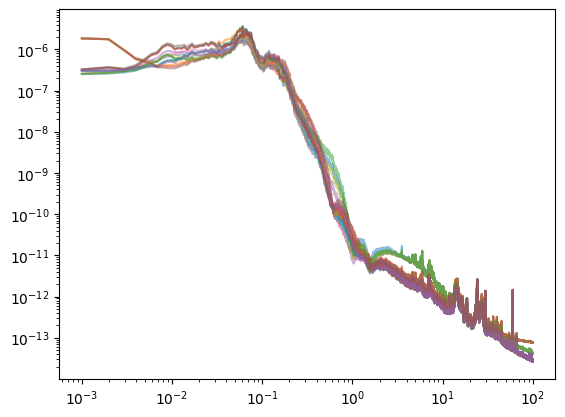

In [42]:
for n_super in n_super_list:
    rms = kontrol.spectral.asd2rms(f=f, asd=(n_super*2*np.pi*f), return_series=False)
    plt.loglog(f, n_super, alpha=.5, label=rms)
# plt.legend(loc=0)
# plt.ylim(1e-8, 1e-5)

In [46]:
print(h_sc_mean.foton())

zpk([-0.009905+i*-0.026538;-0.009905+i*0.026538;-0.193558;-0.367003+i*-0.123903;-0.367003+i*0.123903;-0.408175;-0.455606+i*-0.777630;-0.455606+i*0.777630;-0.923543;-0.555822+i*0.768972;-0.555822+i*-0.768972;-3.46647;-3.64007;-2.623927+i*-4.695553;-2.623927+i*4.695553;-2.679692+i*-4.741463;-2.679692+i*4.741463],[-0.165826;-0.199509+i*-0.221419;-0.199509+i*0.221419;-0.289904+i*0.077436;-0.289904+i*-0.077436;-0.422344+i*-0.110073;-0.422344+i*0.110073;-0.545386+i*-0.770768;-0.545386+i*0.770768;-0.566791+i*0.768191;-0.566791+i*-0.768191;-3.6289;-3.65107;-2.620599+i*-4.692528;-2.620599+i*4.692528;-2.627250+i*-4.698637;-2.627250+i*4.698637],0.931753,"s")


In [47]:
print(h_sc_sigma1.foton())

zpk([-0.015203+i*-0.031889;-0.015203+i*0.031889;-0.382069;-0.367002+i*-0.123904;-0.367002+i*0.123904;-0.567924+i*-0.349313;-0.567924+i*0.349313;-0.416020+i*-1.027183;-0.416020+i*1.027183;-0.448503+i*1.050529;-0.448503+i*-1.050529;-3.64009;-3.7978;-2.526282+i*-4.646460;-2.526282+i*4.646460;-2.623849+i*-4.695590;-2.623849+i*4.695590],[-0.340529;-0.154386+i*-0.317891;-0.154386+i*0.317891;-0.409288+i*0.080069;-0.409288+i*-0.080069;-0.389480+i*-0.207662;-0.389480+i*0.207662;-0.446090+i*-1.049727;-0.446090+i*1.049727;-0.450912+i*1.051384;-0.450912+i*-1.051384;-3.63152;-3.64872;-2.619038+i*-4.692884;-2.619038+i*4.692884;-2.628721+i*-4.698243;-2.628721+i*4.698243],0.916978,"s")


In [48]:
print(h_sc_sigma2.foton())

zpk([-0.016729+i*-0.040233;-0.016729+i*0.040233;-0.367002+i*-0.123901;-0.367002+i*0.123901;-0.387723;-0.564788;-0.80998;-0.465395+i*-0.723859;-0.465395+i*0.723859;-2.79954;-3.64006;-2.559544+i*-3.358122;-2.559544+i*3.358122;-3.429818+i*-3.579573;-3.429818+i*3.579573;-2.623924+i*-4.695569;-2.623924+i*4.695569],[-0.371386;-0.440755+i*0.011660;-0.440755+i*-0.011660;-0.155764+i*-0.419253;-0.155764+i*0.419253;-0.473864+i*-0.330728;-0.473864+i*0.330728;-0.66942;-0.994391;-2.36045;-3.246001+i*-0.538179;-3.246001+i*0.538179;-4.00191;-2.628571+i*-4.665035;-2.628571+i*4.665035;-2.619372+i*-4.724777;-2.619372+i*4.724777],0.907771,"s")


In [8]:
import control
s = control.tf("s")

In [9]:
print(kontrol.TransferFunction((h_sc_prefilt*1/s).minreal()).foton())

zpk([0;0],[-0.018849+i*0.000000;-0.018849+i*-0.000000;-0.0188498],1,"s")


In [11]:
h1_mean

TransferFunction(array([1.11022302e-16, 7.70481908e-02, 1.68176090e+01, 1.66243284e+03,
       1.00304456e+05, 4.19987723e+06, 1.31111246e+08, 3.19455254e+09,
       6.28286301e+10, 1.02226072e+12, 1.39862641e+13, 1.62988819e+14,
       1.63028556e+15, 1.40732366e+16, 1.05204962e+17, 6.82097933e+17,
       3.84440263e+18, 1.88495213e+19, 8.04674778e+19, 2.98766633e+20,
       9.59626370e+20, 2.66047676e+21, 6.27830194e+21, 1.25143309e+22,
       2.07309892e+22, 2.79757346e+22, 3.15882905e+22, 2.87783376e+22,
       2.19946024e+22, 1.34595287e+22, 6.78069740e+21, 2.76533537e+21,
       9.04961335e+20, 2.35577137e+20, 4.66003348e+19, 6.66078767e+18,
       6.67338008e+17, 4.50092383e+16, 1.96514235e+15, 5.36197431e+13,
       8.74335866e+11, 7.76299273e+09, 2.88250038e+07]), array([1.00000000e+00, 2.16304129e+02, 2.09959819e+04, 1.23007540e+06,
       4.95957594e+07, 1.48919942e+09, 3.50535611e+10, 6.68686365e+11,
       1.05718912e+13, 1.40691071e+14, 1.59266838e+15, 1.54418699e+16,
   

In [50]:
h1_mean_ = control.tf(h1_mean.minreal().num[0][0][1:], h1_mean.minreal().den[0][0][0:])
print(kontrol.TransferFunction(h1_mean_).foton())

13:54 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([0.089665+i*-3.567750;0.089665+i*3.567750;-0.080332+i*-4.230446;-0.080332+i*4.230446;-6.28098;-2.977064+i*-5.801657;-2.977064+i*5.801657;-8.92181;-0.280203+i*-9.560425;-0.280203+i*9.560425;-3.103852+i*9.425638;-3.103852+i*-9.425638;-4.622893+i*-11.861070;-4.622893+i*11.861070;-14.384569+i*-19.785973;-14.384569+i*19.785973;-30.1994;-30.6691;-40.7173;-43.9847],[-4.17765;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.28592;-6.27611;-6.28815;-9.10269;-9.54724;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.58122;-4.622671+i*-11.856747;-4.622671+i*11.856747;-4.622509+i*-11.863992;-4.622509+i*11.863992;-30.264;-30.2641;-40.725246+i*-0.000095;-40.725246+i*0.000095],0.0770482,"s")

zpk([-0.021362+i*-0.004969;-0.021362+i*0.004969;-0.056688+i*-0.007754;-0.056688+i*0.007754;-0.087156+i*-0.095389;-0.087156+i*0.095389;-0.255027+i*-0.029038;-0.255027+i*0.029038;-0.051446+i*-0.403522;-0.051446+i*0.403522;-0.098437+i*0.424674;-0.098437+i*-0.424674;-0.111150+i*-0.962711;-0.111150+i*0.962711;-0.329600+

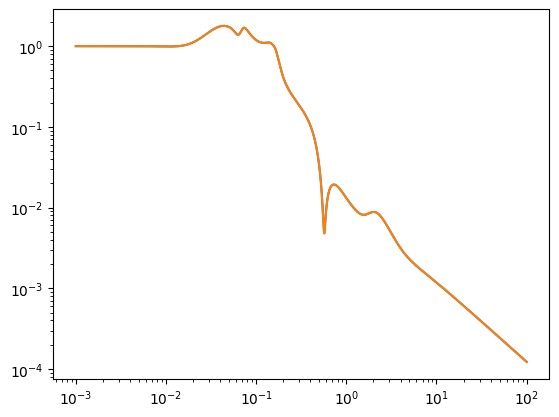

In [53]:
plt.loglog(f, abs(h1_mean_(1j*2*np.pi*f)))
plt.loglog(f, abs(h1_mean(1j*2*np.pi*f)))

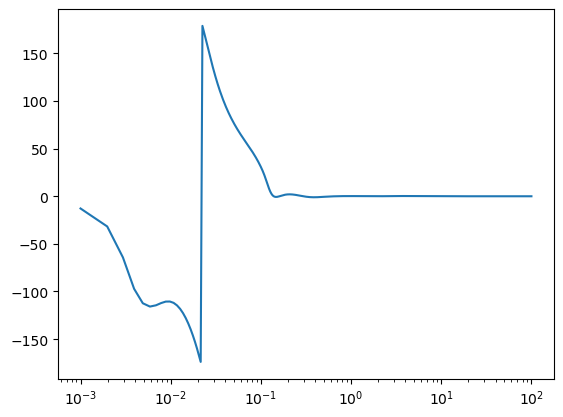

In [6]:
# plt.semilogx(f, abs(h(1j*2*np.pi*f)))
plt.semilogx(f, np.angle(h2_sigma1(1j*2*np.pi*f), deg=True))

In [54]:
h2_mean

TransferFunction(array([1.00000000e+00, 2.16227081e+02, 2.09791643e+04, 1.22841296e+06,
       4.94954549e+07, 1.48499955e+09, 3.49224498e+10, 6.65491813e+11,
       1.05090626e+13, 1.39668810e+14, 1.57868211e+15, 1.52788811e+16,
       1.27122117e+17, 9.10853988e+17, 5.62422926e+18, 2.99495174e+19,
       1.37610892e+20, 5.45010608e+20, 1.85477459e+21, 5.39697486e+21,
       1.33301627e+22, 2.76760094e+22, 4.78503683e+22, 6.81952290e+22,
       7.99395747e+22, 7.83099031e+22, 6.20531917e+22, 4.13483007e+22,
       2.16826612e+22, 9.42657177e+21, 3.20283238e+21, 8.47639615e+20,
       1.67310016e+20, 2.04900751e+19, 1.21042128e+18, 3.52322914e+16,
       6.59057569e+14, 7.64274683e+12, 3.60411344e+10]), array([1.00000000e+00, 2.16228731e+02, 2.09796765e+04, 1.22849311e+06,
       4.95030884e+07, 1.48546436e+09, 3.49414541e+10, 6.66048674e+11,
       1.05215978e+13, 1.39896340e+14, 1.58209799e+15, 1.53222840e+16,
       1.27593753e+17, 9.15274176e+17, 5.66015176e+18, 3.02028953e+19,
   

In [55]:
h2_mean_ = control.tf(h2_mean.num[0][0][0:], h2_mean.den[0][0][0:])
print(kontrol.TransferFunction(h2_mean_).foton())

13:57 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.922792+i*-3.146776;-0.922792+i*3.146776;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.846551+i*-2.719801;-4.846551+i*2.719801;-6.28319;-8.92239;-0.280001+i*-9.560000;-0.280001+i*9.560000;-10.850539+i*2.844193;-10.850539+i*-2.844193;-4.596965+i*-11.836087;-4.596965+i*11.836087;-4.622589+i*-11.860368;-4.622589+i*11.860368;-30.2641;-30.2666;-40.7252;-40.7341],[-4.17765;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.28592;-6.27611;-6.28815;-9.10269;-9.54725;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.58122;-4.622671+i*-11.856747;-4.622671+i*11.856747;-4.622509+i*-11.863992;-4.622509+i*11.863992;-30.264;-30.2641;-40.725246+i*-0.000099;-40.725246+i*0.000099],1,"s")

zpk([-0.0104775;-0.0179169;-0.006203+i*-0.018738;-0.006203+i*0.018738;-0.0593154;-0.237644+i*-0.046452;-0.237644+i*0.046452;-0.041498+i*-0.414574;-0.041498+i*0.414574;-0.101236+i*0.410123;-0.101236+i*-0.410123;-0.119077+i*-0.971607;-0.119077+i*0.971607;-0.212956+i*-0.956547;-0.212956+i*0.956547;-3.1066;-1.000551+i*-3.083

In [131]:
h2_mean_.minreal()

TransferFunction(array([9.99890099e-01, 1.04651645e+02, 5.55754283e+03, 1.87884782e+05,
       4.41767139e+06, 7.50466057e+07, 9.38250283e+08, 8.74686553e+09,
       6.16562964e+10, 3.33575262e+11, 1.40582586e+12, 4.67759799e+12,
       1.24188937e+13, 2.65070698e+13, 4.57098187e+13, 6.38772212e+13,
       7.24800695e+13, 6.68176605e+13, 4.99135354e+13, 2.99896742e+13,
       1.43071109e+13, 5.30855154e+12, 1.48779320e+12, 3.05844075e+11,
       4.52243612e+10, 4.69399530e+09, 3.27039634e+08, 1.44971620e+07,
       3.99798557e+05, 7.37207833e+03, 9.09847970e+01, 6.07089101e-01,
       1.42371835e-03, 7.55708328e-07]), array([1.00000000e+00, 1.04676168e+02, 5.56078289e+03, 1.88102731e+05,
       4.42504692e+06, 7.52108546e+07, 9.40655892e+08, 8.77472604e+09,
       6.19086022e+10, 3.35364239e+11, 1.41615644e+12, 4.72640023e+12,
       1.26089084e+13, 2.71180998e+13, 4.73188766e+13, 6.73174815e+13,
       7.84113122e+13, 7.50528574e+13, 5.91466884e+13, 3.83400472e+13,
       2.03589843e+

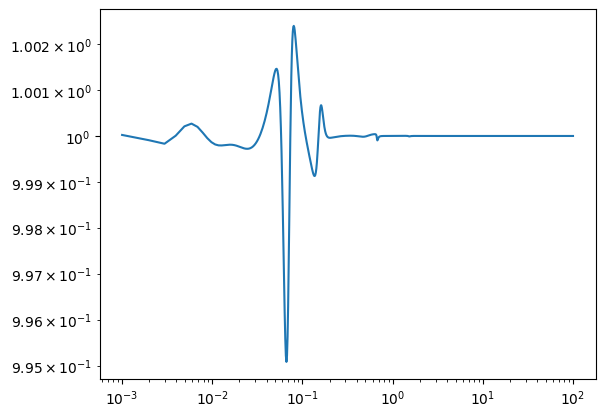

In [57]:
plt.loglog(f, abs((h2_mean_*h2_prefilt+h1_mean_)(1j*2*np.pi*f)))

In [58]:
print(h1_sigma1.foton())

14:06 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([0.074632+i*-3.756746;0.074632+i*3.756746;-0.079977+i*-4.229985;-0.079977+i*4.229985;-6.28321;-1.616309+i*-7.082892;-1.616309+i*7.082892;-0.280001+i*-9.560000;-0.280001+i*9.560000;-2.319291+i*-10.655136;-2.319291+i*10.655136;-4.622769+i*-11.859578;-4.622769+i*11.859578;-12.8831;-29.4102;-16.743015+i*-28.043238;-16.743015+i*28.043238;-40.7252;-45.2122],[-4.218311+i*-0.113200;-4.218311+i*0.113200;-0.080000+i*4.230000;-0.080000+i*-4.230000;-6.25887;-6.36633;-9.23374;-0.280001+i*9.560000;-0.280001+i*-9.560000;-9.86958;-4.616151+i*11.854838;-4.616151+i*-11.854838;-4.629024+i*11.865935;-4.629024+i*-11.865935;-12.8397;-12.9176;-18.1742;-40.725245+i*-0.000098;-40.725245+i*0.000098],0.0793558,"s")

zpk([-0.019651+i*-0.001492;-0.019651+i*0.001492;-0.0593168;-0.0625782;-0.049759+i*-0.087278;-0.049759+i*0.087278;-0.046821+i*-0.091511;-0.046821+i*0.091511;-0.182299+i*-0.048147;-0.182299+i*0.048147;-0.249371;-0.657278;-0.109128+i*-0.913645;-0.109128+i*0.913645;-0.342821+i*-1.062732;-0.342821+i*1

In [59]:
print(h2_sigma1.foton())

14:08 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-3.311715+i*-0.485102;-3.311715+i*0.485102;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.28319;-5.409144+i*-4.619100;-5.409144+i*4.619100;-0.280001+i*-9.560000;-0.280001+i*9.560000;-4.542691+i*-11.890224;-4.542691+i*11.890224;-4.622589+i*11.860368;-4.622589+i*-11.860368;-12.8831;-14.054584+i*-6.170463;-14.054584+i*6.170463;-20.0696;-40.7252;-40.7378],[-4.218311+i*-0.113200;-4.218311+i*0.113200;-0.080000+i*4.230000;-0.080000+i*-4.230000;-6.25887;-6.36633;-9.23374;-0.280001+i*9.560000;-0.280001+i*-9.560000;-9.86958;-4.616151+i*11.854838;-4.616151+i*-11.854838;-4.629024+i*11.865935;-4.629024+i*-11.865935;-12.8397;-12.9176;-18.1742;-40.725245+i*-0.000098;-40.725245+i*0.000098],1,"s")

zpk([-0.005843+i*-0.014138;-0.005843+i*0.014138;-0.0179169;-0.020420+i*-0.048846;-0.020420+i*0.048846;-0.0593168;-0.049764+i*-0.087276;-0.049764+i*0.087276;-0.201199;-0.249973;-0.552471;-0.119836+i*-0.947492;-0.119836+i*0.947492;-0.276404+i*-0.946502;-0.276404+i*0.946502;-1.000551+i*-3.083321;-1.000551+i

In [60]:
print(kontrol.TransferFunction(h1_sigma2.minreal()).foton())

14:09 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-2.72478;-0.976094+i*-3.150256;-0.976094+i*3.150256;0.025173+i*-3.844728;0.025173+i*3.844728;-0.079333+i*-4.231295;-0.079333+i*4.231295;-6.28317;-2.880103+i*-6.910641;-2.880103+i*6.910641;-1.773693+i*-10.013797;-1.773693+i*10.013797;-11.8543;-4.623156+i*-11.859798;-4.623156+i*11.859798;-30.7925;-45.559889+i*-23.955299;-45.559889+i*23.955299;-277.734;-27266],[-1.078864+i*-2.952581;-1.078864+i*2.952581;-0.945412+i*-3.227073;-0.945412+i*3.227073;-4.0926;-0.079966+i*-4.229985;-0.079966+i*4.229985;-4.38088;-6.25397;-6.29806;-9.565149+i*-0.055566;-9.565149+i*0.055566;-4.617419+i*-11.853252;-4.617419+i*11.853252;-4.627767+i*-11.867452;-4.627767+i*11.867452;-30.8782;-40.7248;-1700.92;-8381.8],0.193582,"s")

zpk([-0.0150103;-0.017302+i*0.004491;-0.017302+i*-0.004491;-0.0277367;-0.0593224;-0.0700122;-0.0966335;-0.097656+i*0.117401;-0.097656+i*-0.117401;-0.188135;-0.246421;-0.127850+i*0.851309;-0.127850+i*-0.851309;-0.355743+i*1.059366;-0.355743+i*-1.059366],[-0.0188324;-0.018850+i*0.000017;

In [61]:
print(h2_sigma2.foton())

14:13 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.080000+i*-4.230000;-0.080000+i*4.230000;-5.020897+i*3.604218;-5.020897+i*-3.604218;-6.28319;-0.280001+i*-9.560000;-0.280001+i*9.560000;-11.118152+i*-1.508297;-11.118152+i*1.508297;-4.622589+i*-11.860368;-4.622589+i*11.860368;-4.538454+i*11.901187;-4.538454+i*-11.901187;-30.8782;-30.8796;-40.6665;-40.7252;-1700.31;-8381.8;-8382.32],[-0.079966+i*-4.229985;-0.079966+i*4.229985;-4.38088;-6.25397;-6.29806;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.565149+i*-0.055566;-9.565149+i*0.055566;-4.617419+i*-11.853252;-4.617419+i*11.853252;-4.627767+i*11.867452;-4.627767+i*-11.867452;-30.878199+i*-0.000233;-30.878199+i*0.000233;-40.7248;-40.7257;-1700.92;-8381.796952+i*-0.010576;-8381.796952+i*0.010576],1,"s")

zpk([0.012672+i*-0.023035;0.012672+i*0.023035;-0.011664+i*-0.055193;-0.011664+i*0.055193;-0.0593186;-0.0966157;-0.190566;-0.239215;-0.116141+i*-0.910558;-0.116141+i*0.910558;-0.360202+i*-0.974288;-0.360202+i*0.974288;-2.89676;-1.000551+i*-3.083321;-1.000551+i*3.083321;-0.881242+i*-

In [124]:
wn = 2*np.pi*1
q = 1/np.sqrt(2)
cal = (s**2 + wn/q*s + wn**2) / s**3

In [126]:
print(kontrol.TransferFunction((h2_prefilt*cal).minreal()).foton())

zpk([0;-4.442883+i*4.442883;-4.442883+i*-4.442883],[-0.018848+i*0.000002;-0.018848+i*-0.000002;-0.018851+i*0.000002;-0.018851+i*-0.000002],1,"s")


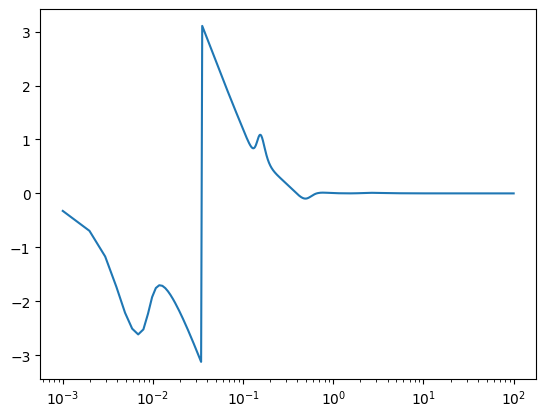

In [64]:
plt.semilogx(f, np.angle((h2_sigma2)(1j*2*np.pi*f)))

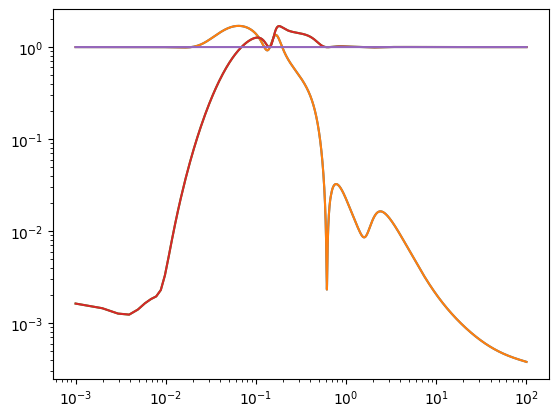

In [62]:
plt.loglog(f, abs(h1_sigma2.minreal()(1j*2*np.pi*f)))
plt.loglog(f, abs(h1_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_sigma2.minreal()(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs((h2_sigma2.minreal()*h2_prefilt + h1_sigma2.minreal())(1j*2*np.pi*f)))